In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mse
from statsmodels.tsa.stattools import adfuller

In [3]:
missing_values =["N/a", "na", np.nan, "", 0, "NaN"]
data = pd.read_csv("../Clean_Dataset/Final.csv",na_values = missing_values)
data = data.iloc[: , 1:]
data.head()

,Entity,Code,Year,Electricity(TWh),Meat_quantity,health_expenditure,GDP,Cereal yield
0,Albania,ALB,1990,3.30,17.00,NaN,2548.112549,2794.399902
1,Albania,ALB,1991,3.82,20.61,NaN,1908.095337,2071.899902
2,Albania,ALB,1992,3.40,20.07,NaN,1822.334717,2158.600098
3,Albania,ALB,1993,3.53,22.12,NaN,2056.373047,2685.000000
4,Albania,ALB,1994,3.94,24.94,NaN,2288.676025,2460.899902


In [4]:
traindata = data.loc[(data['Year'] <= 2015) & (data['Year'] > 1999)]
# traindata.Year = pd.to_datetime(traindata.Year,"%Y")
testdata = data.loc[(data['Year'] > 2015) & (data['Year']<=2018)]


In [5]:
country = ['Canada','India','Germany','France']
traindata = traindata.loc[(data['Entity'] == 'Canada') | (data['Entity'] == 'India') | (data['Entity'] == 'Germany') | (data['Entity'] == 'France')]
xtrain = traindata[['Entity','Code','Year','Electricity(TWh)','health_expenditure','Cereal yield']]
xtest = testdata[['Entity','Code','Year','Electricity(TWh)','health_expenditure','Cereal yield']]
ytrain = traindata[['Entity','Code','Year','GDP']]
ytest = testdata[['Entity','Code','Year','GDP']]


## Simple Linear Regression


 Canada :
Electricity(Twh) vs GDP
actual:  [46472. 48317. 49993.]
predicted:  [46811.16941482 46969.08166201 45189.98276616]
health_expenditure vs GDP
actual:  [46472. 48317. 49993.]
predicted:  [47246.33537589 48081.94770055 49550.9244628 ]
Cereal yield vs GDP
actual:  [46472. 48317. 49993.]
predicted:  [48566.43893927 46637.06819964 44660.68894263]

 India :
Electricity(Twh) vs GDP
actual:  [5840. 6183. 6675.]
predicted:  [6142.4894223  6466.22475147 6967.86640283]
health_expenditure vs GDP
actual:  [5840. 6183. 6675.]
predicted:  [5905.01629965 5167.38033382 5615.23870317]
Cereal yield vs GDP
actual:  [5840. 6183. 6675.]
predicted:  [5375.26970841 6029.5530838  6390.55055019]


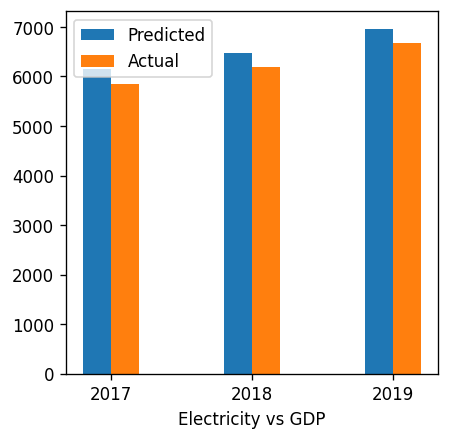

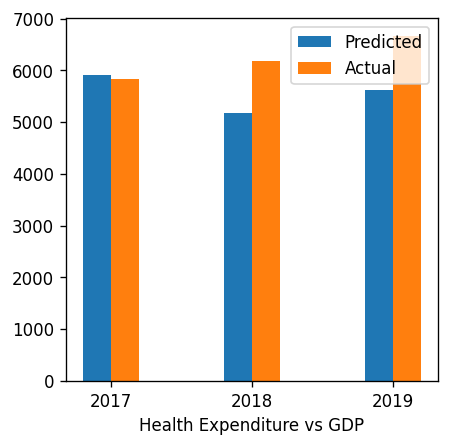

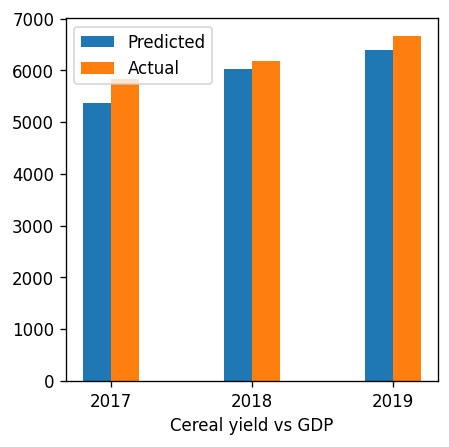


 Germany :
Electricity(Twh) vs GDP
actual:  [50580. 53071. 55235.]
predicted:  [42786.9186764  43440.59759018 41127.326777  ]
health_expenditure vs GDP
actual:  [50580. 53071. 55235.]
predicted:  [50632.45959369 53208.87650626 56855.26326292]
Cereal yield vs GDP
actual:  [50580. 53071. 55235.]
predicted:  [39009.49553302 39614.35481659 32380.82787443]

 France :
Electricity(Twh) vs GDP
actual:  [42925. 44577. 46577.]
predicted:  [32475.69068297 32168.84250961 34924.36390279]
health_expenditure vs GDP
actual:  [42925. 44577. 46577.]
predicted:  [42169.28535573 43019.58759818 44075.4067228 ]
Cereal yield vs GDP
actual:  [42925. 44577. 46577.]
predicted:  [27774.86113685 34491.23861081 32761.00755604]


In [44]:
import statsmodels.api as sm
from sklearn import linear_model

for each in country:
    x = xtrain.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    xtest_new = xtest.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    y = ytrain.loc[(data['Entity'] == each),['GDP']]
    ytest_new = ytest.loc[(data['Entity'] == each),['GDP']].to_numpy().flatten().round()
    predicts = []
    x1 = x['Electricity(TWh)'].values.reshape(-1,1)
    x2 = x['health_expenditure'].values.reshape(-1,1)
    x3 = x['Cereal yield'].values.reshape(-1,1)

    reg =linear_model.LinearRegression()
    
    reg.fit(x1,y)
    print("\n",each,":")
    print('Electricity(Twh) vs GDP')
    print("actual: ",ytest_new)
    predicts.append(reg.predict(xtest_new['Electricity(TWh)'].values.reshape(-1,1)).flatten())
    print("predicted: ",predicts[0])
    reg.fit(x2,y)
    print('health_expenditure vs GDP')
    print("actual: ",ytest_new)
    predicts.append(reg.predict(xtest_new['health_expenditure'].values.reshape(-1,1)).flatten())
    print("predicted: ",predicts[1])
    reg.fit(x3,y)
    print('Cereal yield vs GDP')
    print("actual: ",ytest_new)
    predicts.append(reg.predict(xtest_new['Cereal yield'].values.reshape(-1,1)).flatten())
    print("predicted: ",predicts[2])
    if (each =='India'):
        labels = ['2017', '2018', '2019']
        x = np.arange(len(labels))  # the label locations
        fig, ax = plt.subplots( figsize=(4,4))
        width = 0.20 
        rects1 = ax.bar(x - width/2, predicts[0], width, label='Predicted')
        rects2 = ax.bar(x + width/2, ytest_new, width, label='Actual')
        ax.set_xticks(x, labels)
        ax.set_xlabel('Electricity vs GDP')
        ax.legend()
        plt.show()
        fig, ax = plt.subplots( figsize=(4,4))
        rects1 = ax.bar(x - width/2, predicts[1], width, label='Predicted')
        rects2 = ax.bar(x + width/2, ytest_new, width, label='Actual')
        ax.set_xticks(x, labels)
        ax.set_xlabel('Health Expenditure vs GDP')
        ax.legend()
        plt.show()
        fig, ax = plt.subplots( figsize=(4,4))
        rects1 = ax.bar(x - width/2, predicts[2], width, label='Predicted')
        rects2 = ax.bar(x + width/2, ytest_new, width, label='Actual')
        ax.set_xticks(x, labels)
        ax.set_xlabel('Cereal yield vs GDP')
        ax.legend()
        plt.show()
      
    predicts = []

## Multi Linear Regression

In [7]:
from sklearn import linear_model

for each in country:
    x = xtrain.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    xtest_new = xtest.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    y = ytrain.loc[(data['Entity'] == each),['GDP']]
    ytest_new = ytest.loc[(data['Entity'] == each),['GDP']].to_numpy().flatten().round()

    reg =linear_model.LinearRegression()
    reg.fit(x,y)
    print(each, " :")
    print("actual: ",ytest_new)
    predicts = reg.predict(xtest_new).flatten()
    print("predicted: ",predicts)

Canada  :
actual:  [46472. 48317. 49993.]
predicted:  [47750.86583043 48410.77284978 49060.64039712]
India  :
actual:  [5840. 6183. 6675.]
predicted:  [5974.92120339 6197.92899991 6668.28750793]
Germany  :
actual:  [50580. 53071. 55235.]
predicted:  [50636.89611296 53153.02266945 56163.82002396]
France  :
actual:  [42925. 44577. 46577.]
predicted:  [42098.98682805 42636.90348965 44188.49446149]


## ARIMA

Augmented Dickey-Fuller Statistic: -2.817552
p-value: 0.055810
Augmented Dickey-Fuller Statistic: 0.209270
p-value: 0.972777
Augmented Dickey-Fuller Statistic: 2.070127
p-value: 0.998757
Augmented Dickey-Fuller Statistic: -1.601512
p-value: 0.482834


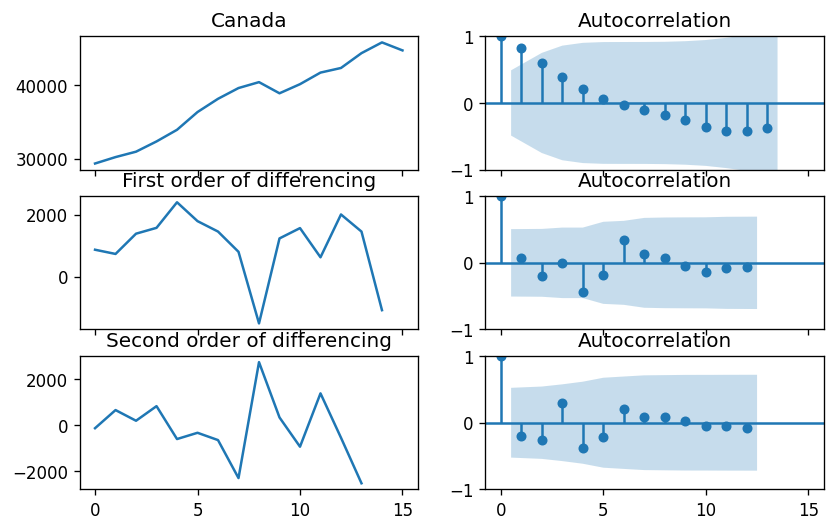

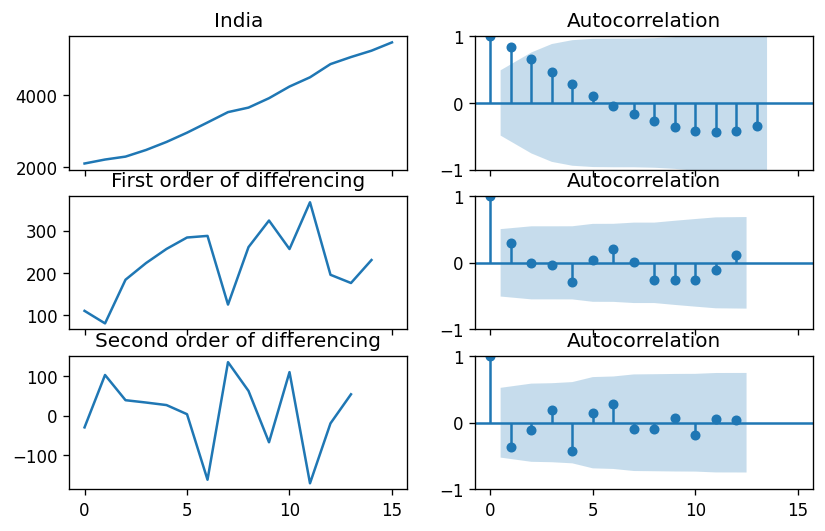

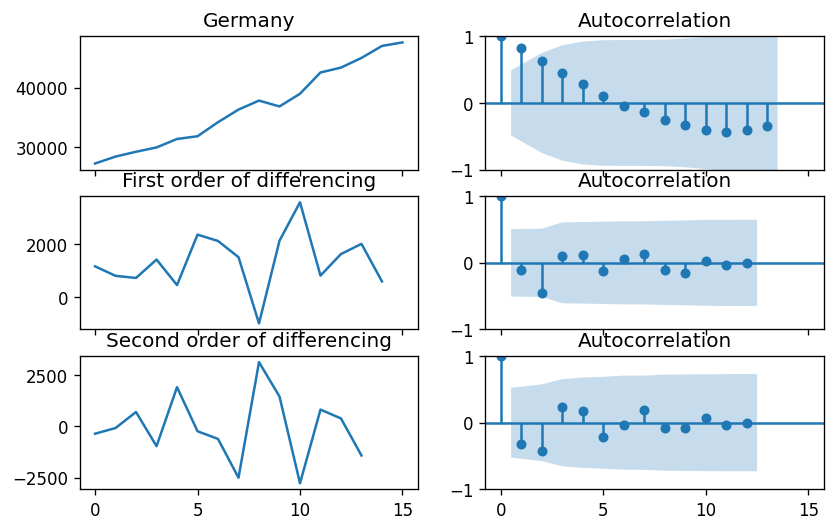

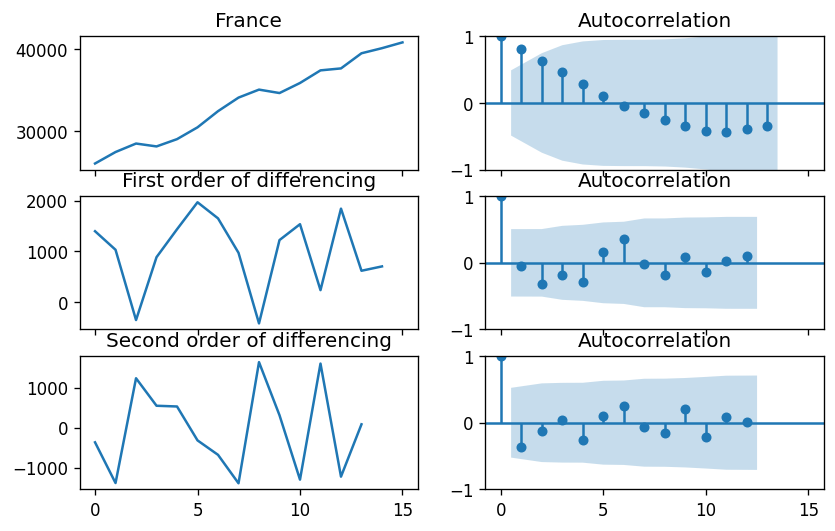

In [8]:
from numpy import sqrt,mean,log,diff
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  



for each in country:
    x = xtrain.loc[(data['Entity'] == each),['Year','Electricity(TWh)','health_expenditure','Cereal yield']]
    y = ytrain.loc[(data['Entity'] == each),['Year','GDP']]
    y = y.set_index('Year')
    # performing dickeyfuller test to  determine whether the time series is staionary or not. 
    res = adfuller( y.dropna())  
    print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
    print('p-value: %f' % res[1])   
    #ACF plot 
    plt.rcParams.update({'figure.figsize' : (8,5), 'figure.dpi' : 120})  
    fig, axes = plt.subplots(3, 2, sharex = True)  
    axes[0, 0].plot(y.to_numpy().flatten()); axes[0, 0].set_title(each)  
    plot_acf(y.to_numpy().flatten(), ax = axes[0, 1])  

    y1 = y.diff().dropna()
    axes[1,0].plot(y1.to_numpy().flatten()); axes[1, 0].set_title("First order of differencing")  
    plot_acf(y1.to_numpy().flatten(), ax = axes[1, 1])  
    
    y2 = y.diff().diff().dropna()
    axes[2,0].plot(y2.to_numpy().flatten()); axes[2, 0].set_title("Second order of differencing")  
    plot_acf(y2.to_numpy().flatten(), ax = axes[2, 1])

## Elastic Net Model

In [9]:
from sklearn.linear_model import ElasticNet

for each in country:
    x = xtrain.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    xtest_new = xtest.loc[(data['Entity'] == each),['Electricity(TWh)','health_expenditure','Cereal yield']]
    y = ytrain.loc[(data['Entity'] == each),['GDP']]
    ytest_new = ytest.loc[(data['Entity'] == each),['GDP']].to_numpy().flatten()
    ENmodel = ElasticNet(alpha=1.0, l1_ratio=0.5)
    ENmodel.fit(x,y)
    predictions = ENmodel.predict(xtest_new)
    print(each, " :")
    print("actual: ",ytest_new)
    print("predicted: ",predictions)
    print("RMSE: ",math.sqrt(mse(ytest_new,predictions)),"\n")

Canada  :
actual:  [46472.33984 48317.17578 49992.76172]
predicted:  [47750.24245817 48409.73149451 49061.34632192]
RMSE:  27.700022447379727 

India  :
actual:  [5839.864746 6182.921875 6675.361328]
predicted:  [5975.47753929 6201.95477363 6672.44582608]
RMSE:  7.247095828373895 

Germany  :
actual:  [50579.68359 53071.45703 55235.36719]
predicted:  [50636.92567415 53153.16742165 56165.29822087]
RMSE:  18.875764944035996 

France  :
actual:  [42924.61328 44577.06641 46576.60156]
predicted:  [42101.74518476 42638.63531927 44188.77859463]
RMSE:  41.42914493983027 



## Vector Auto-Regression

In [10]:
india_train = traindata.loc[(traindata["Entity"]=="India"),["Year"	,"Electricity(TWh)"	,"health_expenditure"	,"GDP"	,"Cereal yield"]]
df_test = testdata.loc[(testdata["Entity"]=="India") & (testdata["Year"] > 2015),["Year"	,"Electricity(TWh)"	,"health_expenditure"	,"GDP"	,"Cereal yield"]]
india_train = india_train.set_index("Year")
india_train

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

for name in india_train.columns:
    adfuller_test(india_train[name],name = name)
    india_train[name] = india_train[name]

t1 = india_train.diff().dropna()

for name in india_train.columns:
    adfuller_test(t1[name],name = name)

t2 = india_train.diff().dropna()
  



    Augmented Dickey-Fuller Test on "Electricity(TWh)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.346
 No. Lags Chosen       = 6
 Critical value 1%     = -4.473
 Critical value 5%     = -3.29
 Critical value 10%    = -2.772
 => P-Value = 0.999. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
    Augmented Dickey-Fuller Test on "health_expenditure" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.2102
 No. Lags Chosen       = 2
 Critical value 1%     = -4.069
 Critical value 5%     = -3.127
 Critical value 10%    = -2.702
 => P-Value = 0.9989. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: 

In [11]:
from statsmodels.tsa.api import VAR
model = VAR(t2)
fitted = model.fit(4)
fitted.summary()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\vector_ar\var_model.py:1545: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Nov, 2022
Time:                     21:31:44
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -227.177
Nobs:                     11.0000    HQIC:                  -231.187
Log likelihood:           1268.57    FPE:               3.77292e-103
AIC:                     -229.637    Det(Omega_mle):    8.98704e-105
--------------------------------------------------------------------
Results for equation Electricity(TWh)
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.001364              NAN              NAN             NAN
L1.Electricity(TWh)           0.418123         0.000000     54303544.634           0.000
L1.health_expendi

In [12]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted.resid)

for col, val in zip(india_train.columns, out):
    print(adjust(col), ':', round(val, 2))

NameError: name 'adjust' is not defined

In [13]:
lag_order = fitted.k_ar
print("current model lag order: ",lag_order)

forecast_input = india_train.values[-lag_order:]
forecast = fitted.forecast(y=forecast_input, steps= 4)

df_forecast = pd.DataFrame(forecast, index=india_train.index[-4:], columns=india_train.columns + '_2d')
df_forecast

current model lag order:  4


,Electricity(TWh)_2d,health_expenditure_2d,GDP_2d,Cereal yield_2d
Year,,,,
2012,1777.189451,576.755120,-1682.364085,-246.291050
2013,1720.851595,-10.489601,-46.876018,-5196.469900
2014,993.690783,73.956035,7806.987933,-4685.640665
2015,2305.261813,-253.872545,16410.431748,6986.082030


In [14]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(india_train, df_forecast, second_diff=True)
df_results["GDP_forecast"]

Year
2012     4013.472341
2013     2515.209288
2014     8823.934170
2015    31543.090799
Name: GDP_forecast, dtype: float64

In [15]:
df_test['Electricity(TWh)'][-4:]

1404    1401.741821
1405    1471.342285
1406    1579.191162
Name: Electricity(TWh), dtype: float64

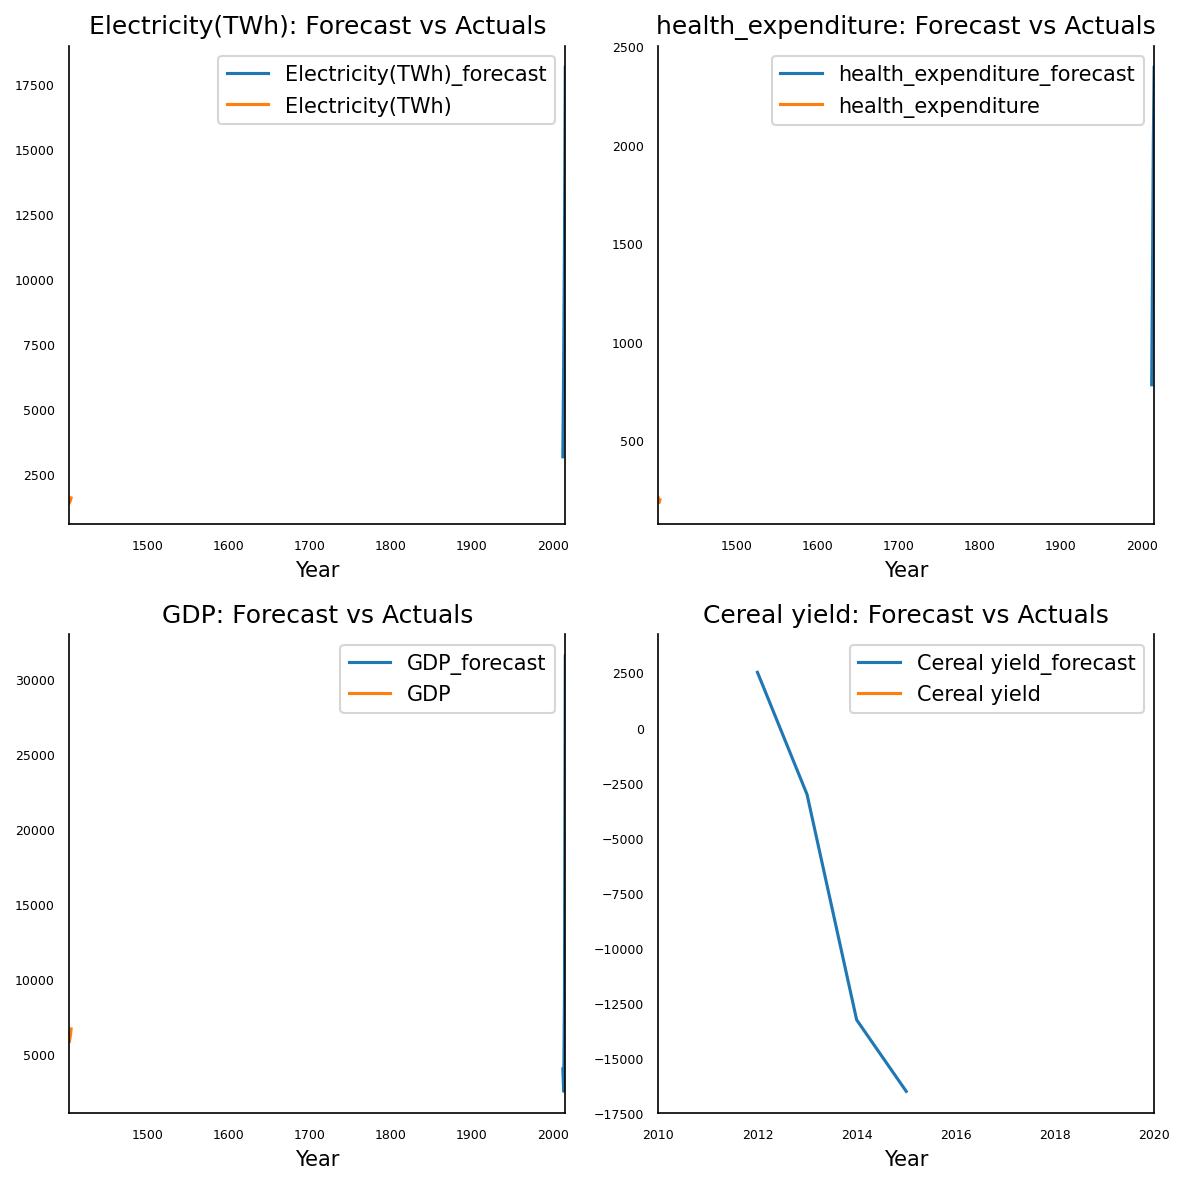

In [17]:
fig, axes = plt.subplots(nrows=int(len(india_train.columns)/2), ncols=2, dpi=150, figsize=(8,8))
for i, (col,ax) in enumerate(zip(india_train.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-4:].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.xlim(2010, 2020)
plt.tight_layout()
